# Campus recruitment Analysis

### Importing the Libraries

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from warnings import simplefilter
from sklearn.naive_bayes import GaussianNB

### Importing the Dataset
The dataset is all all about the placement details of all the students.

In [403]:
dataset = pd.read_csv("Placement_Data_Full_Class.csv")

### Getting Inference from the dataset

So, the dataset that got imported is shown.

In [404]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Status is our label that very much clear from our objective point of view but now lets check the number of Rows and Column present in the dataset and then find out the features in the dataset.

In [405]:
dataset.shape

(215, 15)

So, in our dataset there are 215 Rows and 15 Columns.

In [406]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We can clearly see that the above dataset has lot null value/NaN values in salary column.So we will not use it in our prediction. Moreover the sl_no column is not of any use in our prediction so we we drop it as well.

In [407]:
dataset.drop(['sl_no','salary'], axis = 1, inplace = True)

Now that we have dropped sl_no and salary column from our dataset lets have a look at our modified dataset.

In [408]:
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


The dependence of type of board in placements is pretty unclear from the prediction point of view so lets have a look at the count plot of ssc_b first. This is just to visualize the number of choosing the board.

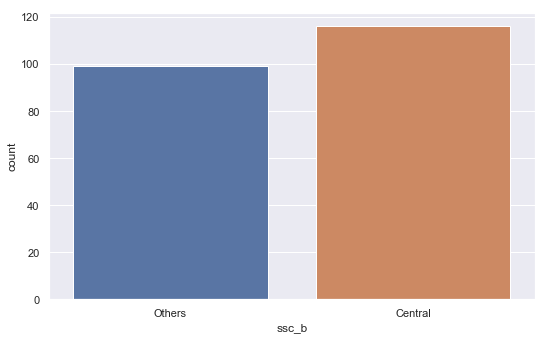

In [409]:
sns.countplot("ssc_b", data = dataset)

This clearly shows that the number of students in senior secondary prefer central board more than that of other boards but nevertheless the difference is too less.

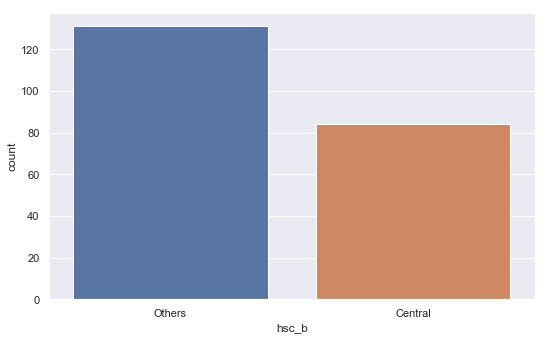

In [410]:
sns.countplot("hsc_b", data = dataset)

Its interesting to note that the number of students in central board have decreased but again we can infer that the difference in the number of students is quite less.

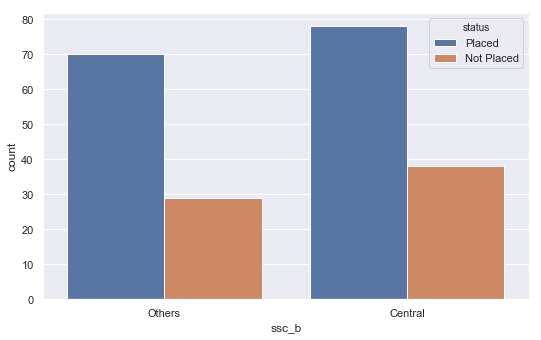

In [411]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("ssc_b", hue="status", data=dataset)

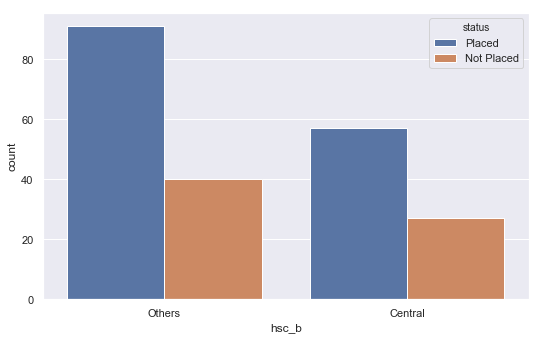

In [412]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("hsc_b", hue="status", data=dataset)

In both the cases we infer that the choosing of boards does not impact the students getting placed. One may argue that the difference of students getting places especially the student of other board as in hsc_b is quite noticible but we neglect this fact provided the number of students studying in other board in higher seconday was also high and that can be on of the major reason of this difference. 
So, finally we can say that the choosing of board has nothing to do with the student getting placed.

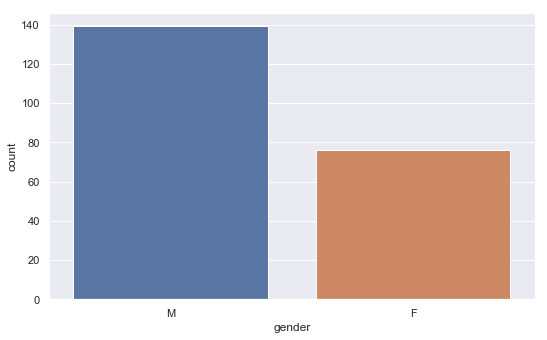

In [413]:
sns.countplot("gender", data = dataset)

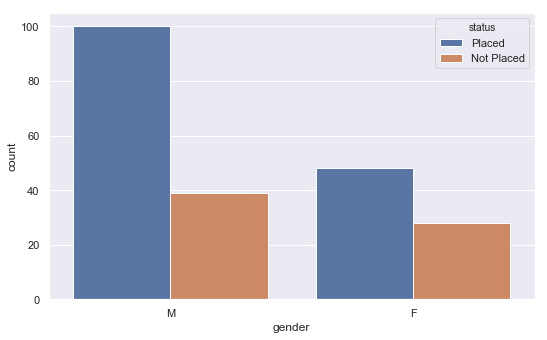

In [414]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("gender", hue="status", data=dataset)

The above count plot shows the total number of males and females in our dataset and from this countplot we can clearly state that the number of males is greater than the number of females. It can also be stated that the number of males getting placed is more than that of the females.

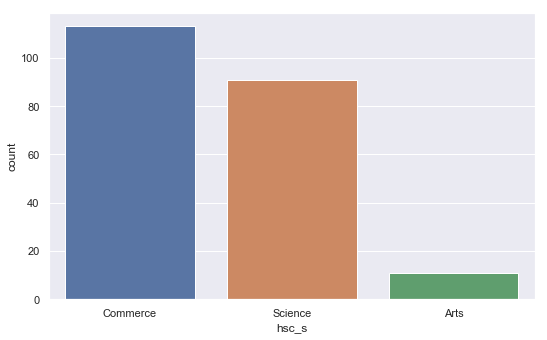

In [415]:
sns.countplot("hsc_s", data = dataset)

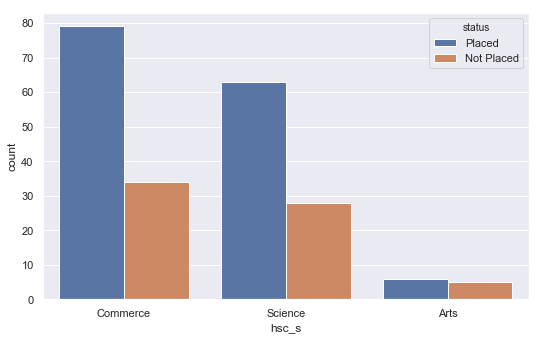

In [416]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("hsc_s", hue="status", data=dataset)

The above count plot shows the total number of students taking commerce, science and arts in higher secondary from our dataset and from this countplot we can clearly state that the number of students taking up commerce is quite high compared to science and arts. Moreover the craze of the students taking arts is too low.
From the second countplot it is also evident that the commerce students performed well during the placements.

In [417]:
dataset.drop(['ssc_b','hsc_b'], axis = 1, inplace = True)

Now that we have dropped ssc_b and hsc_b lets have a look at our dataset.

In [418]:
dataset.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


We can find that that in our dataset we have many column but in this gender, hsc_s, degree_t, workex, specialisation and status columns have categorical data i.e. these columns have strings instead of integers. But ML models work on purely mathematical calculations and thus we need to convert the strings to integers in the above mentioned columns.

One more thing to note here is that columns gender, workex, specialisation and status have only two type of values so its better to apply integer encoding in this case.

The columns hsc_s and degree_t have 3 types of data so we will use here get dumies to keep everything simple.

In [419]:
dataset["gender"] = dataset["gender"].map({"M":0,"F":1})
dataset["workex"] = dataset["workex"].map({"No":0, "Yes":1})
dataset["specialisation"] = dataset["specialisation"].map({"Mkt&HR":0, "Mkt&Fin":1})
dataset["status"] = dataset["status"].map({"Not Placed":0,"Placed":1})

In [420]:
for column in ["hsc_s", "degree_t"]:
    dummies = pd.get_dummies(dataset[column])
    dataset[dummies.columns] = dummies

The get_dummies function creates new columns as required and thus now the old columns are not of any use so we can drop them.

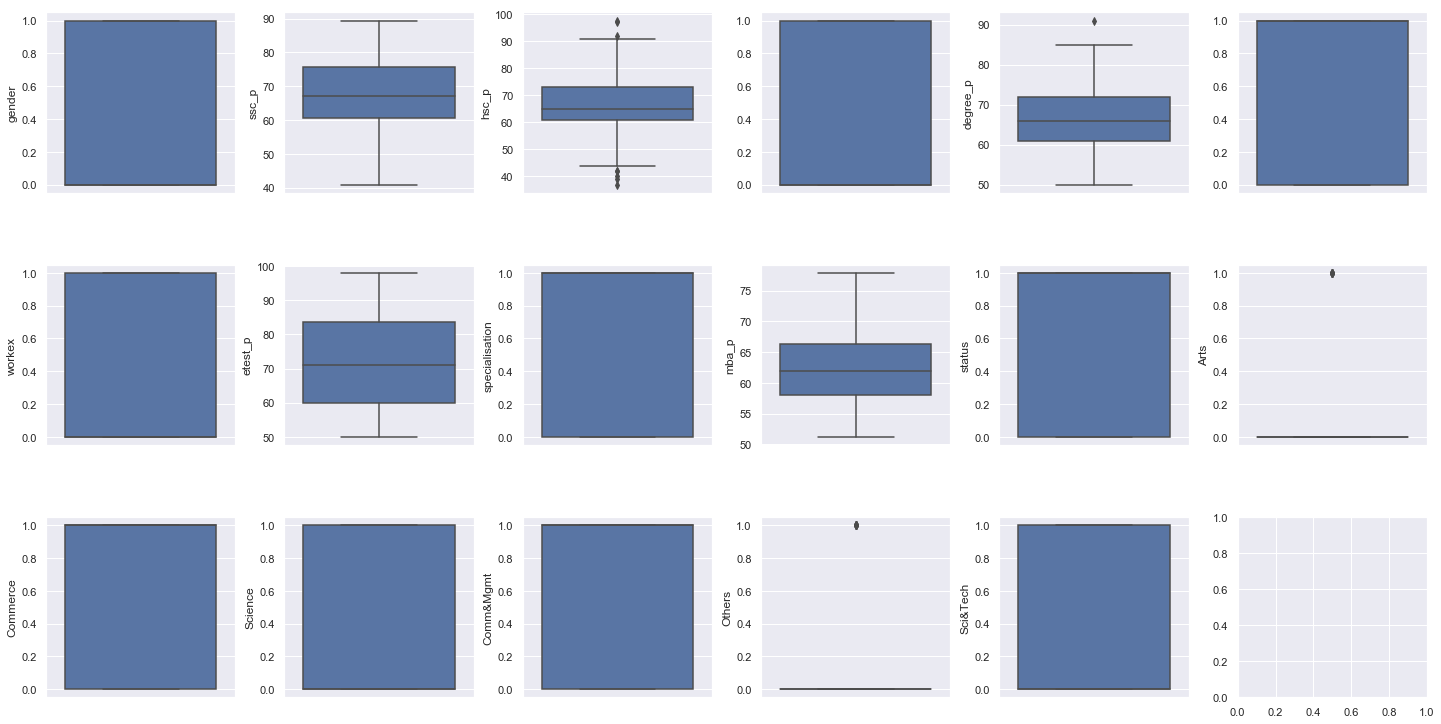

In [421]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

The above boxplot shows the values present in each column and the outliners present in them. 
Now our observation suggest that our dataset is mostly free from ouliner except the hsc_p, degree_p, arts and others. But among all these the outliners in others and arts column are quite evident and thus we need to drop them. 
Moreover the columns hsc_s and degree_t is not needed as we have divided the column based on its data and therefore these columns need to be dropped.

In [422]:
dataset.drop(['hsc_s','degree_t'], axis = 1, inplace = True)

We have dropped hsc_s and degree_t from our dataset but before dropping the arts and others column we must check once more if at all they are required.
Now, lets have a look at our dataset once again and have a look at its features.

In [423]:
dataset.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1,0,1,0,1,0,0


In [424]:
dataset.describe()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,66.333163,66.370186,0.344186,72.100558,0.558140,62.278186,0.688372,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,10.897509,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,37.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,60.900000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,67.000000,65.000000,66.000000,0.000000,71.000000,1.000000,62.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,73.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,97.700000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now lets draw the heat map and check if any other column we can drop or not.

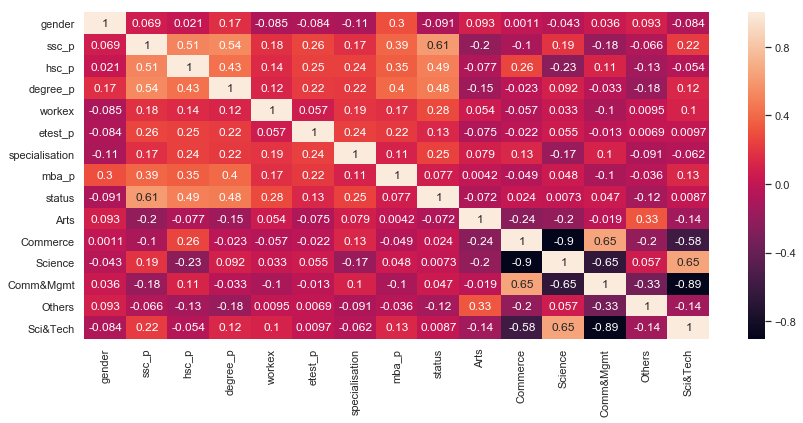

In [425]:
cor=dataset.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True)

From the above heat tabe we can find that the 'others' and 'Arts' columns are showing a large negative deviation moreover from the boxplot also we have found a lot of outliners in them so lets drop these columns.

In [426]:
dataset.drop(['Others','Arts'], axis = 1, inplace = True)

In [427]:
dataset.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Commerce,Science,Comm&Mgmt,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1,1,0,0,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,1,0,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1,0,0,1,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0,1,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1,1,0,1,0


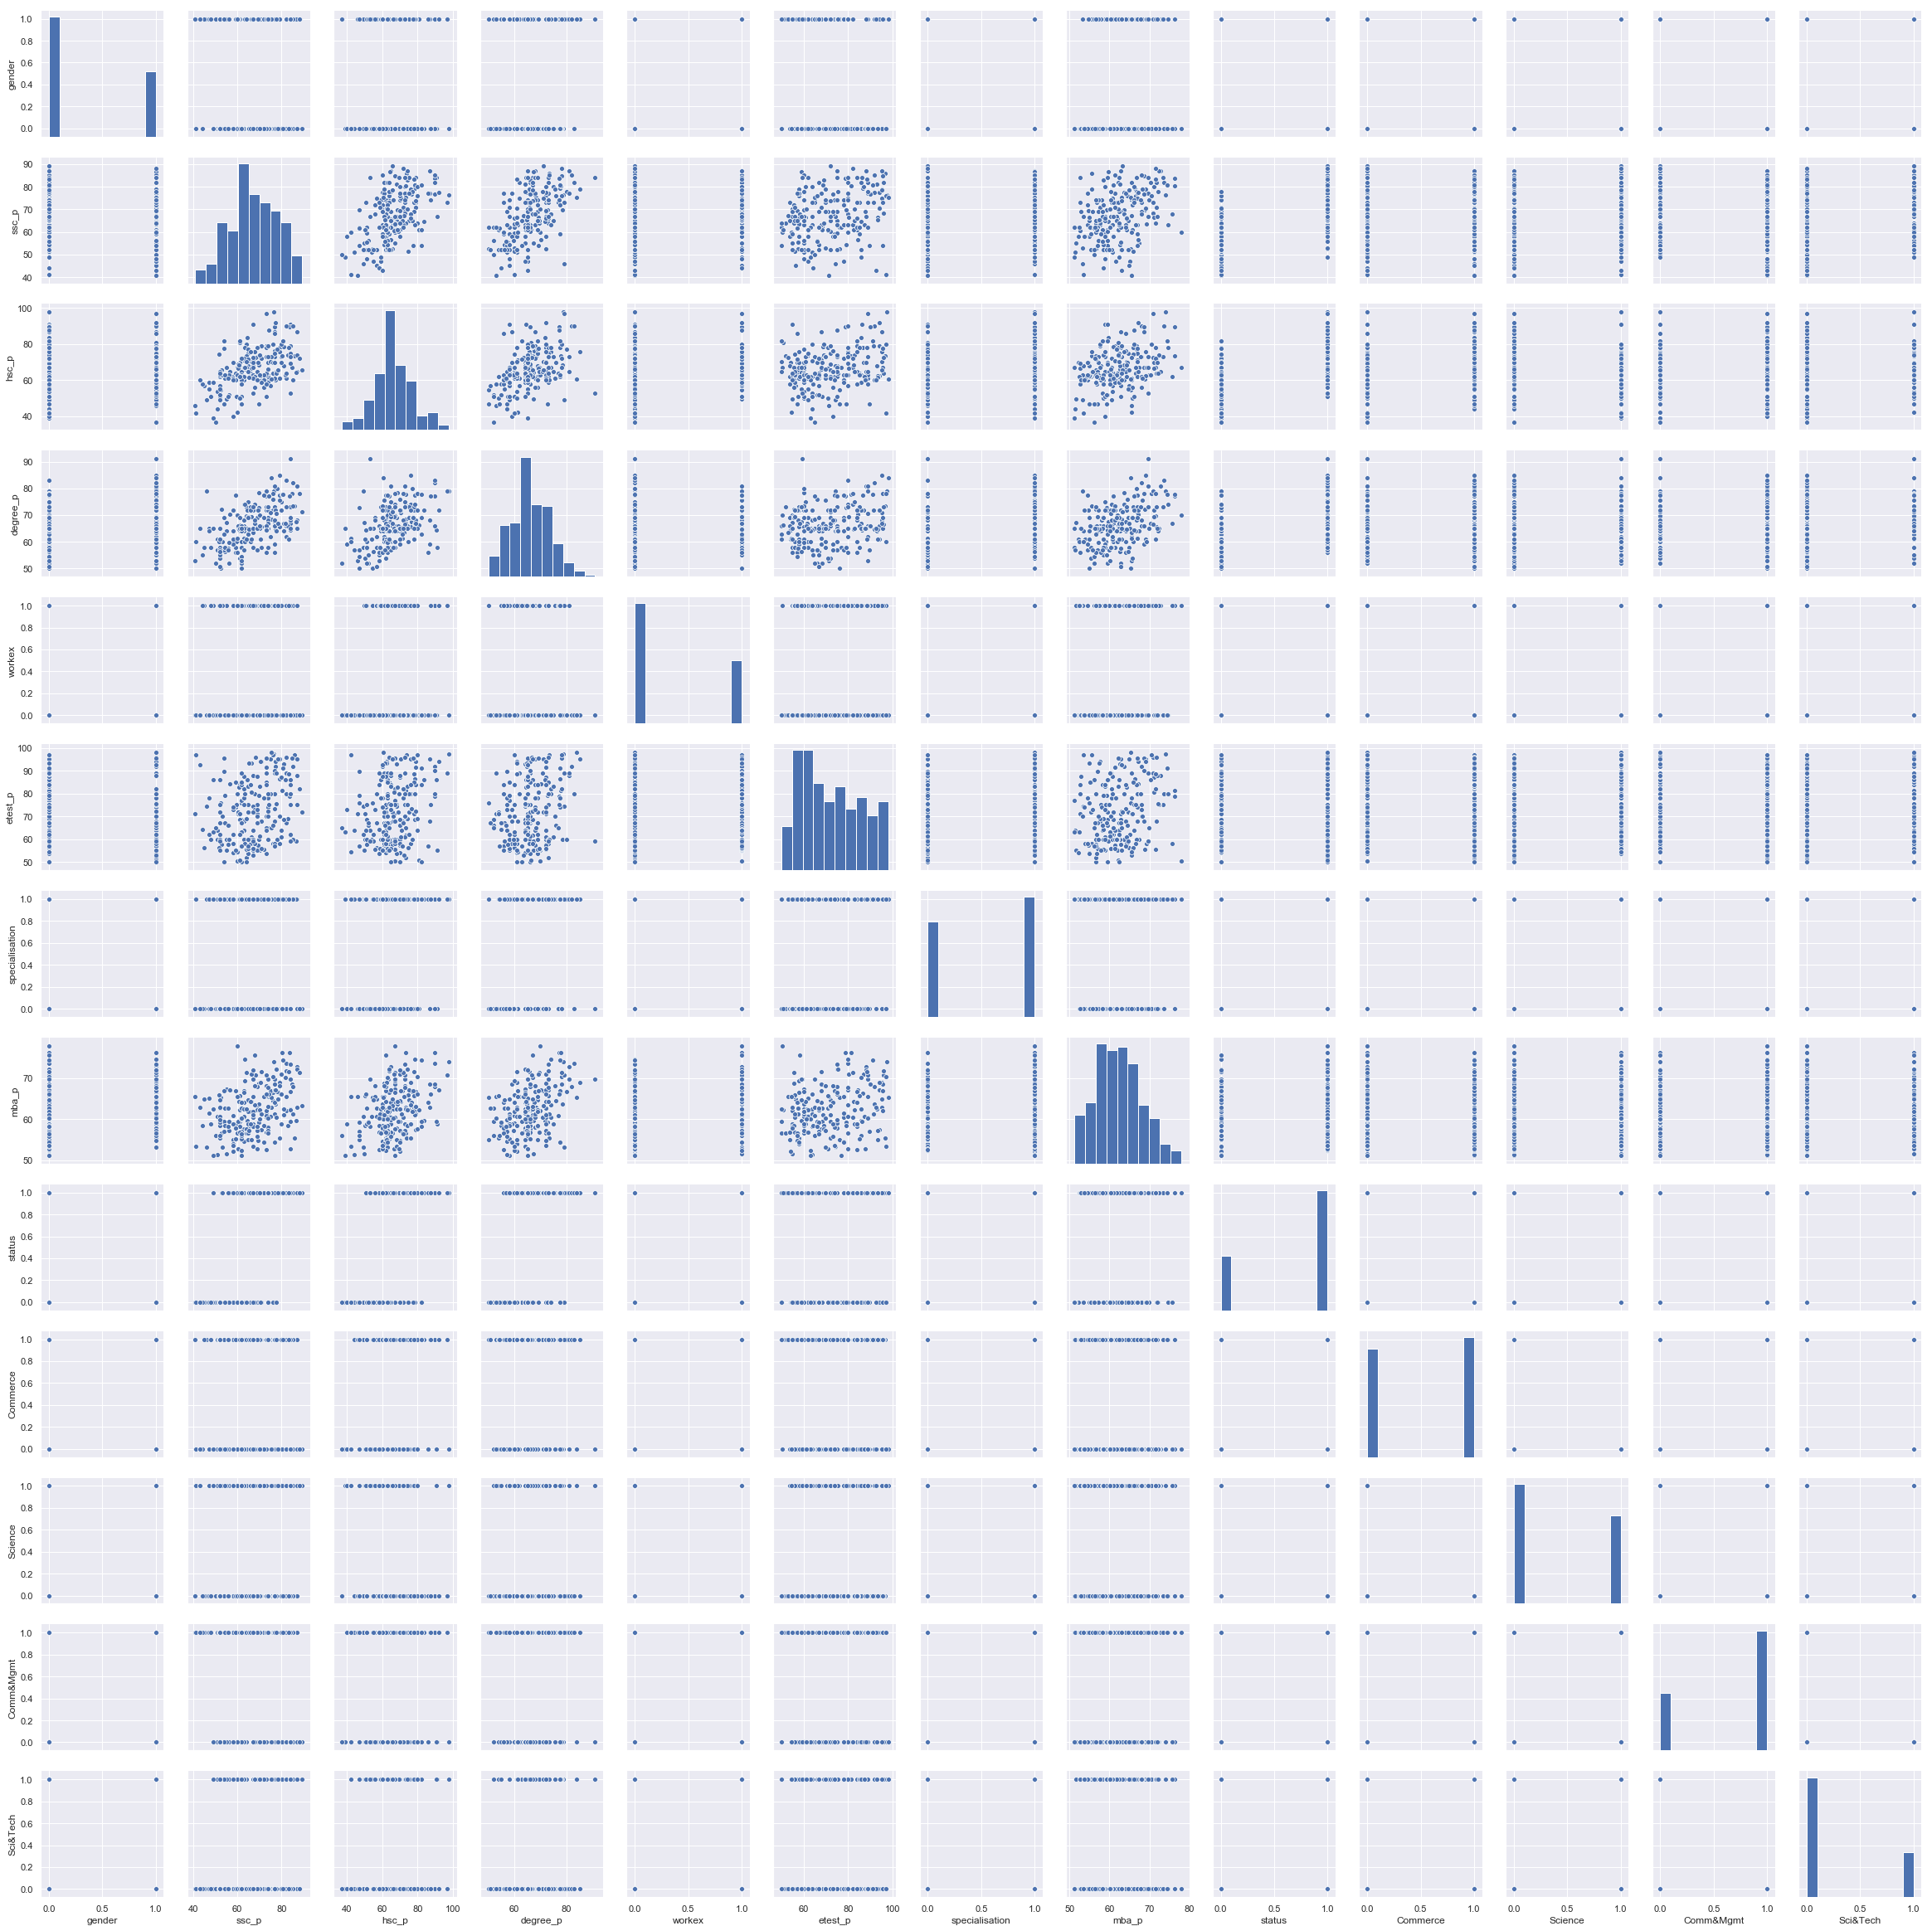

In [428]:
sns.pairplot(dataset)

The above pairplot model shows the relation of each column with every other column and from this we can infer that we need to use classification method for predicting our data.

Therefore, here we will use Logistic regression and Naive Bayes Algorithm for predicting the data.

In [429]:
simplefilter(action='ignore', category=FutureWarning)

We have included this code to avoid any FutureWarning in our model.

### Test Train Split Data

In [430]:
Y = dataset.iloc[:,8]
dataset.drop(['status'], axis = 1, inplace = True)
sc = StandardScaler()
X = sc.fit_transform(dataset)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Naive Bayes
Now that our dataset is ready we can start our main process that is predicting the results.

In [431]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Now that our model is ready. We are good to go with the prediction and finding the accuracy of our model.

#### Now lets have a look at the accuracy of our predicted result (Naive Bayes)

In [432]:
log.score(x_train,y_train)

0.9266666666666666

The accuracy of the prediction of train set is around 92.67%

In [433]:
a = accuracy_score(y_pred,y_test)
print("The accuracy of this prediction of test set is: " + str(a*100))

The accuracy of this prediction of test set is: 80.0


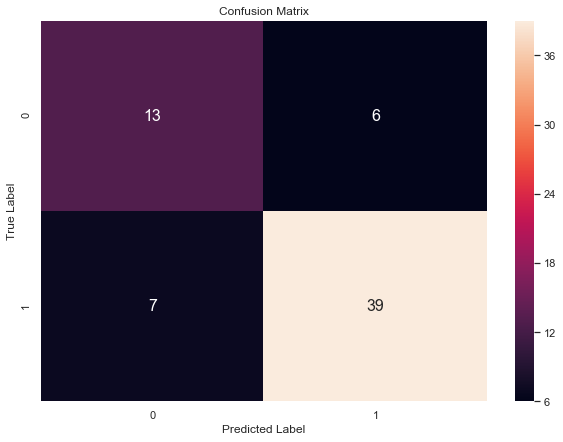

In [434]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix heat map in Naive Bays algorithm.

In [435]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.85      0.87      0.86        45

   micro avg       0.80      0.80      0.80        65
   macro avg       0.77      0.76      0.76        65
weighted avg       0.80      0.80      0.80        65



The above data shows the classification report.

### Logistic regression

Now that our model is ready. We are good to go with the prediction and finding the accuracy of our model.

In [436]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [437]:
y_pred = log.predict(x_test)

#### Now lets have a look at the accuracy of our predicted result (Logistic regression)

In [438]:
log.score(x_train,y_train)

0.9266666666666666

The accuracy of the prediction of training data is 92.67%.

In [439]:
a = accuracy_score(y_pred,y_test)
print("The accuracy of this prediction test data is: " + str(a*100))

The accuracy of this prediction test data is: 86.15384615384616


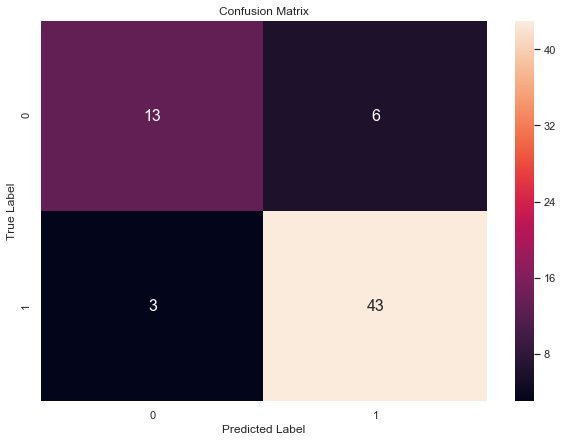

In [440]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The classification report of our prediction is as follows.

In [441]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.93      0.88      0.91        49

   micro avg       0.86      0.86      0.86        65
   macro avg       0.81      0.85      0.82        65
weighted avg       0.87      0.86      0.87        65



## Final Observation
Therefore it can be well said that Logistic regression is the more suitable than Naive Bays algorithm in doing the campus recruitment analysis because the accuracy of the predicted data in case of Logistic Regression is more than that of Naive Bays Algorithm.